In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import group_data as gd
import flylib
import pylab as plb
calc_new_stats = False
plb.rcParams['pdf.fonttype'] = 42

In [54]:
fly = gd.swarms['GMR22H05'].flies[11]

In [55]:
sigs = fly.get_pkl_data('nnls_fits_no_bk_dF_F_sigs.cpkl')

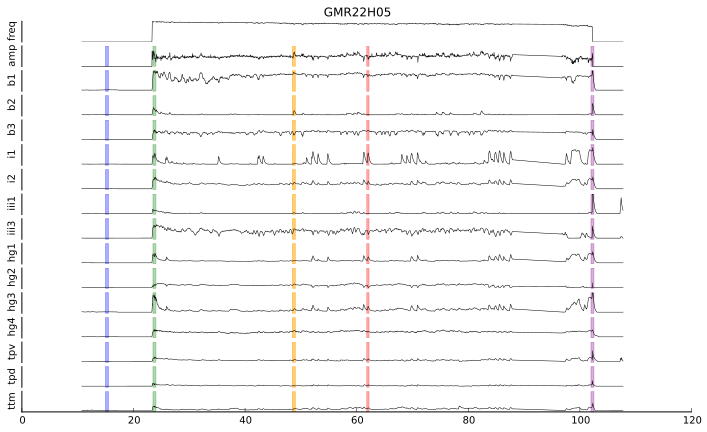

In [58]:
## import numpy as np
fig = plb.figure(figsize = (12,7))
slist = ['GMR22H05','GMR39E01','GMR31E10','GMR29E05','GMR10A12','GMR75B06','GMR74F03']

plot_sigs = ['wb_frequency','Ph1','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4','tpv','tpd','ttm']

from matplotlib.gridspec import GridSpec
gs = GridSpec(len(plot_sigs),1)
plotpans = [plb.subplot(gs[i,0]) for i in range(len(plot_sigs))]

def frmt_axis(r,c,row,col):
    plb.gca().spines['top'].set_visible(False)
    plb.gca().spines['right'].set_visible(False)
    plb.gca().spines['left'].set_visible(False)
    plb.gca().spines['bottom'].set_visible(False)
    plb.gca().set_ybound(-0.1,1.8)
    [x.set_visible(False) for x in plb.gca().get_xticklabels()]
    [y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklines()]
    [y.set_visible(False) for y in plb.gca().get_yticklines()]
    if (c == 0):
        plb.gca().spines['left'].set_visible(True)
        plb.gca().set_ylabel(row)
    if (r == len(plot_sigs)-1):
        plb.gca().spines['bottom'].set_visible(True)
        [x.set_visible(True) for x in plb.gca().get_xticklabels()]
        [x.set_visible(True) for x in plb.gca().get_xticklines()[::2]]
    if (r == 0):
        plb.gca().set_title(col)
    if ('amp' in row):
        plb.gca().set_ybound(0,90)
    if ('freq' in row):
        plb.gca().set_ybound(0,250)

#swm = slist[1]
#fly_idx = 5

rng2 = slice(30850-500,30850)
rng1 = slice(0,4000)

rng2 = np.arange(30850-500,30850)
rng1 = np.arange(0,3500)

trng = np.hstack((rng1,rng2))
times = sigs['times'][np.hstack((rng1,rng2-rng2[0]+rng1[-1]+400))]
flight_mask = sigs['wb_frequency'][trng] > 20
import numpy as np
kwargs = {'color':'k','lw':0.5}

hlt_rng0 = [15,15.5]
hlt_rng1 = [23.5,24]
hlt_rng2 = [48.5,49]
hlt_rng3 = [61.8,62.2]
hlt_rng4 = [102,102.5]

for i,pp,sig in zip(range(len(plot_sigs)),plotpans,plot_sigs):
    plb.axes(pp)
    if 'Ph1' in sig:
        plb.plot(times,np.rad2deg(sigs[sig][trng]/5.0)*flight_mask,**kwargs)
        frmt_axis(i,0,'amp',None)
        plb.axvspan(hlt_rng0[0],hlt_rng0[1],alpha = 0.3,color = 'b')
        plb.axvspan(hlt_rng1[0],hlt_rng1[1],alpha = 0.3,color = 'g')
        plb.axvspan(hlt_rng2[0],hlt_rng2[1],alpha = 0.5,color = 'orange')
        plb.axvspan(hlt_rng3[0],hlt_rng3[1],alpha = 0.3,color = 'r')
        plb.axvspan(hlt_rng4[0],hlt_rng4[1],alpha = 0.3,color = 'purple')
        
    elif 'wb_frequency' in sig:
        plb.plot(times,sigs[sig][trng],**kwargs)
        frmt_axis(i,0,'freq','GMR22H05')
    else:
        try:
            plb.plot(times,sigs[sig][trng],**kwargs)
            frmt_axis(i,0,sig,None)
            plb.axvspan(hlt_rng0[0],hlt_rng0[1],alpha = 0.3,color = 'b')
            plb.axvspan(hlt_rng1[0],hlt_rng1[1],alpha = 0.3,color = 'g')
            plb.axvspan(hlt_rng2[0],hlt_rng2[1],alpha = 0.5,color = 'orange')
            plb.axvspan(hlt_rng3[0],hlt_rng3[1],alpha = 0.3,color = 'r')
            plb.axvspan(hlt_rng4[0],hlt_rng4[1],alpha = 0.3,color = 'purple')
        except KeyError:
            print i
        
plb.savefig('intro_trace_broad.pdf')